In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
plt.rcParams['axes.unicode_minus'] = False 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np
	f
%matplotlib inline
%configft InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False
# 그래프에서 마이너스 폰트 깨질 경우 대비

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild() # 이걸 해줘야 plt.rc가 작동

In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from fbprophet import Prophet
from datetime import datetime
import numpy as np
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving science_data.xlsx to science_data.xlsx


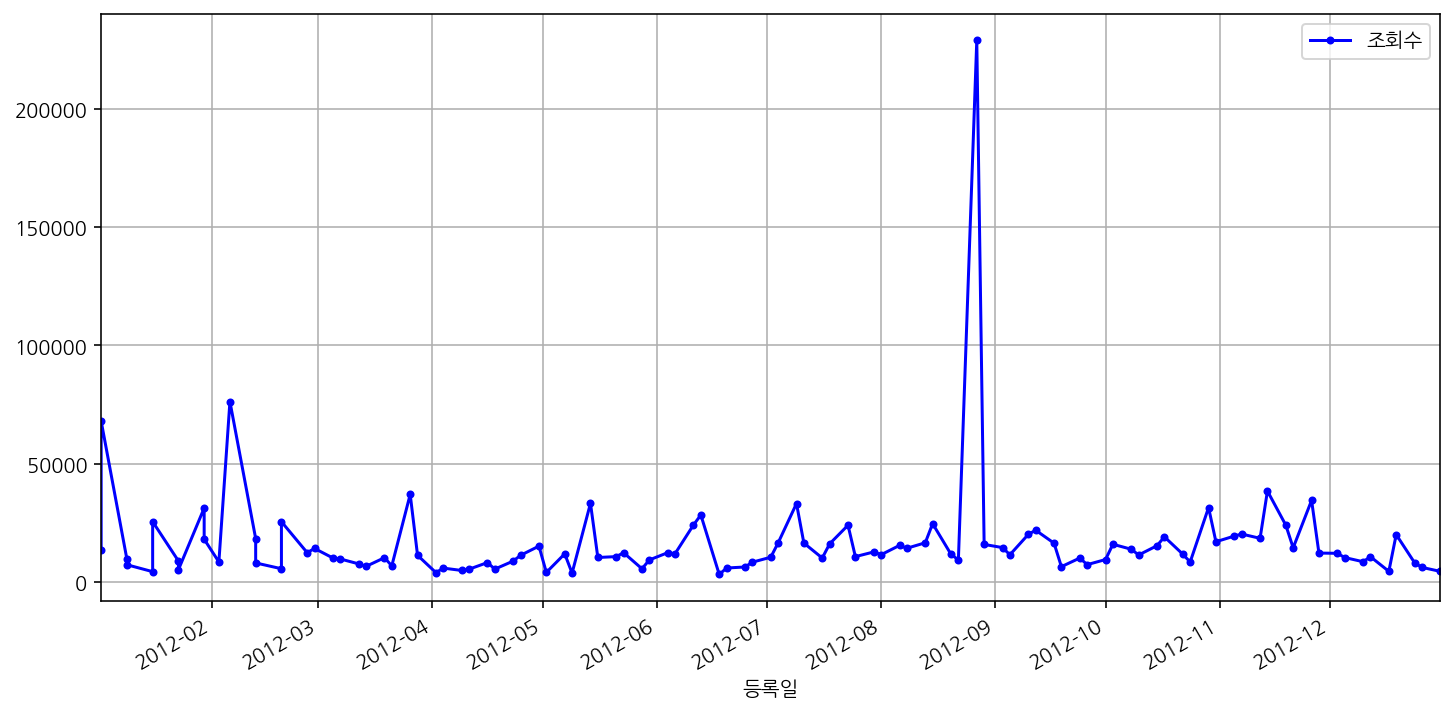

In [0]:
df=pd.read_excel('science_data.xlsx')
df.head()
df.fillna(value='미정', inplace=True)

df.plot(figsize=(12,6), x='등록일', y='조회수',color='blue',marker='.')
plt.grid()

In [0]:
df_pro=pd.DataFrame({'ds':df['등록일'], 'y':df['조회수']})
m=Prophet(daily_seasonality=True, yearly_seasonality=True)
m.fit(df_pro)
future=m.make_future_dataframe(periods=365)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [0]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
465,2013-12-27,-30224.536981,-56970.372677,-3239.913153
466,2013-12-28,-15209.027645,-41037.229866,11891.807341
467,2013-12-29,-16554.637012,-43374.434736,8722.955864
468,2013-12-30,-5616.461563,-31699.707220,21724.814439
469,2013-12-31,-19647.512798,-46885.605609,6312.510805


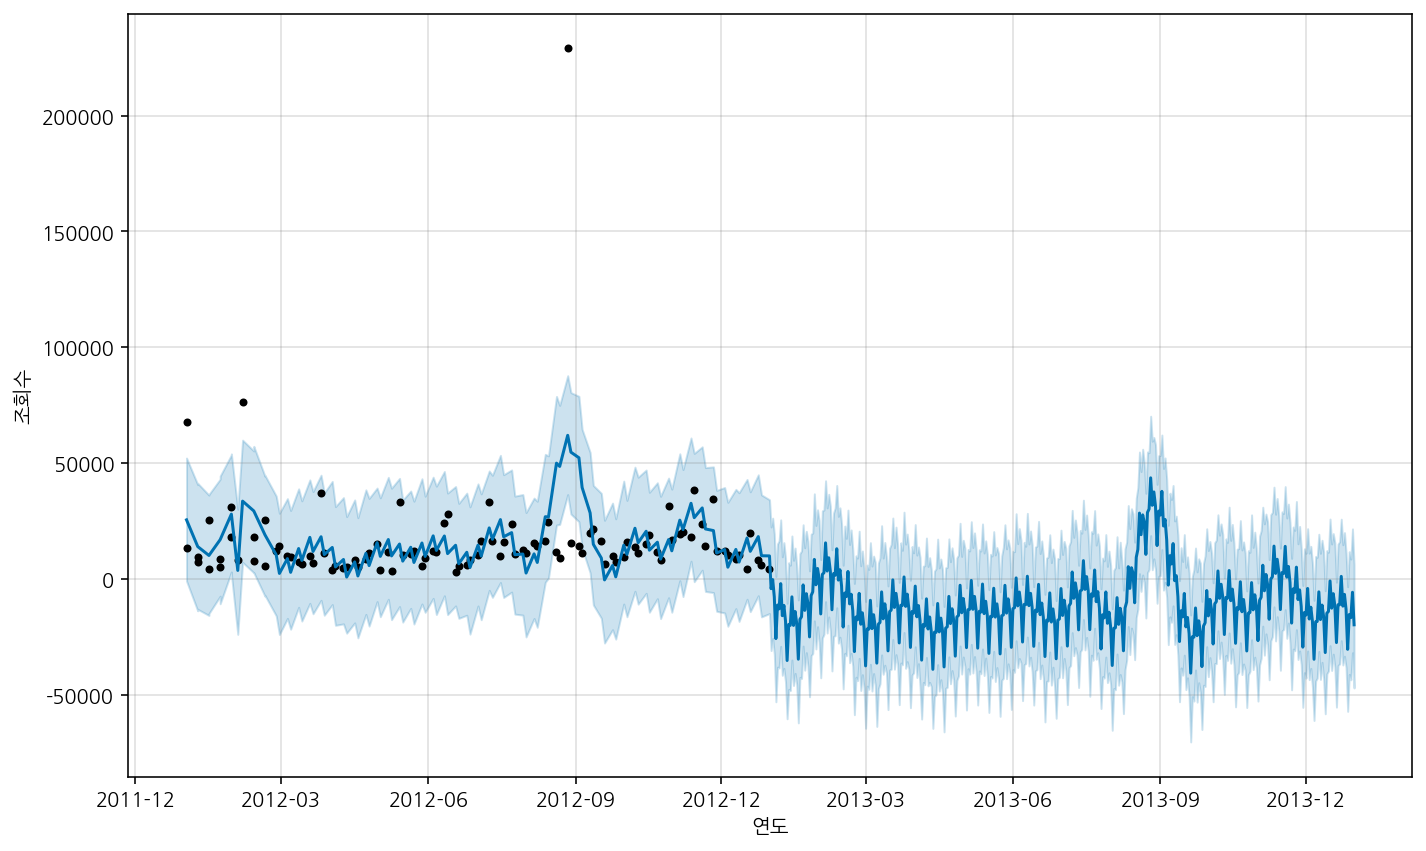

In [0]:
m.plot(forecast,xlabel='연도', ylabel='조회수');

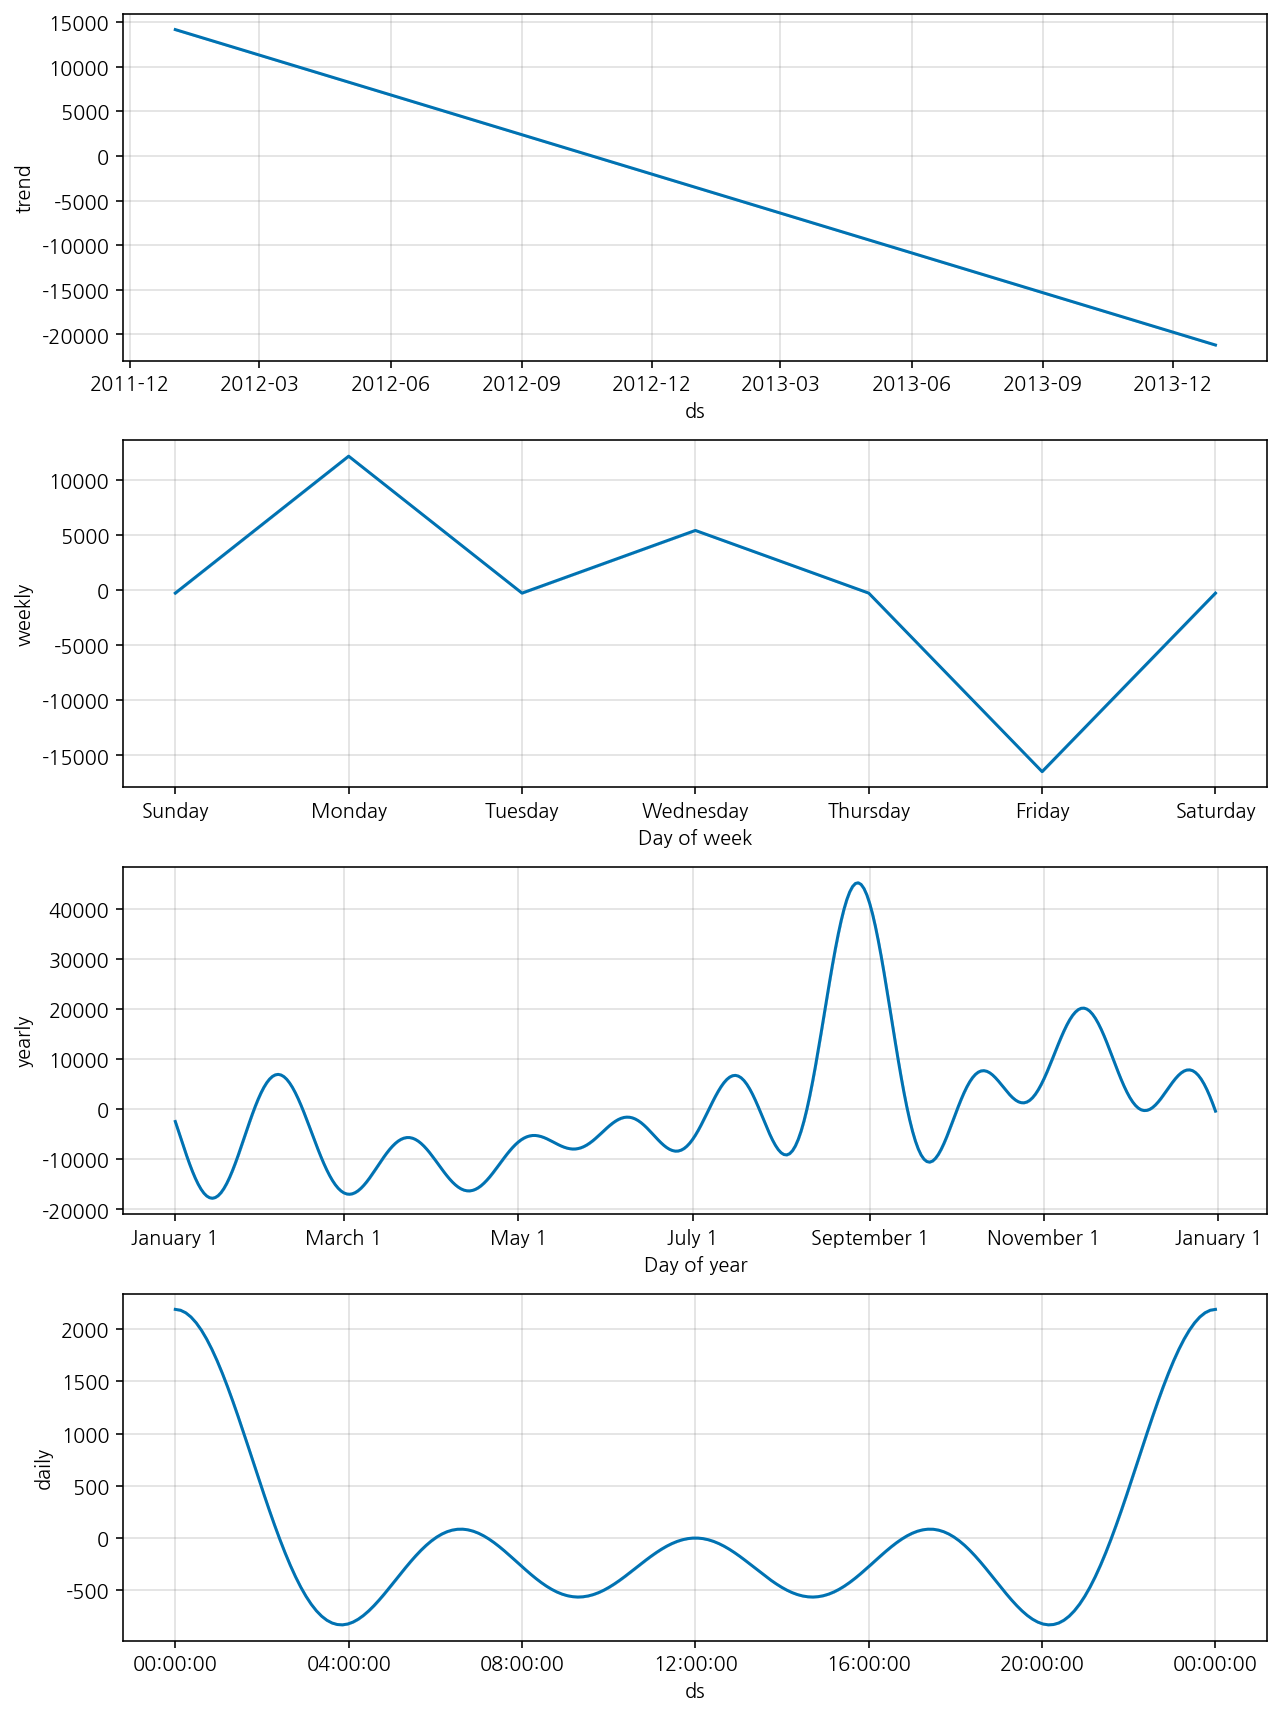

In [0]:
m.plot_components(forecast);

# 위 그래프 component에서 trend가 음의 기울기이므로 사이트를 닫아야한다.